## 1. Visualisation

In [2]:
!pip install scprep umap-learn phate
!pip install --U --no-catche-dir gdown -- pre


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --U


In [3]:
!pip install scprep phate umap-learn
!pip install -U --no-cache-dir gdown -- pre

In [70]:
import gdown
import scprep
import phate

In [71]:
import numpy, pandas, matplotlib,umap
import matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 
                            'xtick.labelsize':30, 'ytick.labelsize':30, 'figure.figsize':(12, 6.75), 
                            'axes.labelsize':40})

In [8]:
from sklearn.decomposition import PCA
#from sklearn.cluster 

In [9]:
filename = 'Glioblastoma_expressed_genes.txt'
data1= pandas.read_table(filename, delimiter='\t',index_col=0)
data=data1.transpose()
data.head()

GENE,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSCAN30,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3
MGH264_A01,0.0,0.000000,0.000000,8.471800,8.212539,1.148348,7.280847,8.315297,6.301266,6.185458,...,8.855828,4.730564,0.000000,0.0,0.000000,0.0,1.148348,6.428980,0.000000,0.0
MGH264_A02,0.0,0.000000,0.826908,8.179233,0.000000,3.643079,6.080252,1.721877,8.743318,9.428493,...,5.505911,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5.961101,4.673498,0.0
MGH264_A03,0.0,0.000000,5.718741,0.000000,0.000000,3.122213,0.000000,0.000000,6.557108,0.000000,...,0.000000,0.000000,8.640176,0.0,0.000000,0.0,3.243285,3.256131,3.243285,0.0
MGH264_A04,0.0,0.000000,2.319947,9.334512,0.000000,0.000000,6.982978,0.000000,9.479903,0.000000,...,7.046613,6.773274,2.263933,0.0,0.000000,0.0,0.000000,1.536796,0.000000,0.0
MGH264_A05,0.0,7.632395,1.818624,0.000000,8.136521,7.721043,8.008524,8.373760,9.054301,0.000000,...,0.000000,0.000000,7.447092,0.0,8.572684,0.0,7.659566,3.293084,0.000000,0.0


Index(['MGH264_A01', 'MGH264_A02', 'MGH264_A03', 'MGH264_A04', 'MGH264_A05',
       'MGH264_A06', 'MGH264_A07', 'MGH264_A08', 'MGH264_A10', 'MGH264_A11',
       ...
       'MGH31_H02', 'MGH31_H04', 'MGH31_H05', 'MGH31_H06', 'MGH31_H07',
       'MGH31_H08', 'MGH31_H09', 'MGH31_H10', 'MGH31_H11', 'MGH31_H12'],
      dtype='object', length=430)

In [21]:
#list= list(data.index)
#list_pacients_id
pacients_ids = [element.split('_')[0] for element in data.index.to_list()]
pacients_unique_id = list(set(pacients_ids))
print(pacients_unique_id)
#Unique codes

['MGH31', 'MGH30', 'MGH28', 'MGH264', 'MGH26', 'MGH29']


%%time 
data_pca = scprep.reduce.pca(data, n_components=100, method='dense')

#data_p = load_digits().data
pca = sklearn.cluster.PCA(2)
new_position = sklearn.cluster.pca.fit_transform(data)
new_position.shape

### >>Sklearn PCA

In [11]:
pca= PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [13]:
transformed = pca.transform(data)
print(transformed.shape)


(430, 2)


In [67]:
type(transformed)

numpy.ndarray

In [72]:
data[data.get_index("MGH29")]

AttributeError: 'DataFrame' object has no attribute 'get_index'

In [65]:
xs = transformed[:,0]
ys = transformed[:,1]
#matplotlib.pyplot.scatter(xs, ys, c=c )

/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

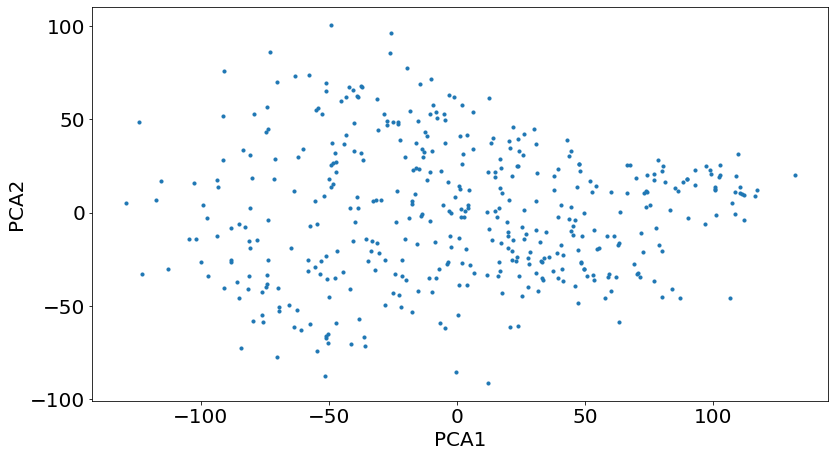

In [104]:
scprep.plot.scatter2d(data_pca, legend_anchor = (1,1), ticks=True, label_prefix = 'PCA')

In [16]:
import sklearn.manifold 
tsne_op = sklearn.manifold.TSNE()
data_tsne = tsne_op.fit_transform(data)

/Users/lidiayung/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/lidiayung/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='t-SNE1', ylabel='t-SNE2'>

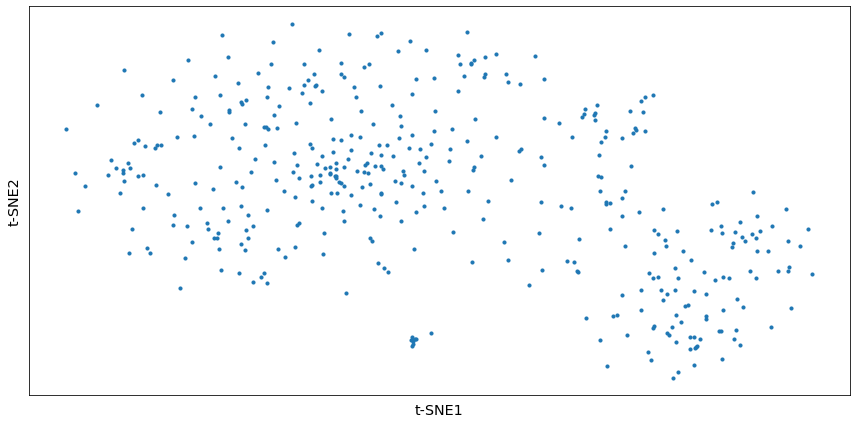

In [17]:
scprep.plot.scatter2d(data_tsne,
                     figsize=the_fig_size, legend_anchor = (1,1),ticks = False, label_prefix = 't-SNE')

In [83]:
umap_op = umap.UMAP()
data_umap = umap_op.fit_transform(data_pca)

/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

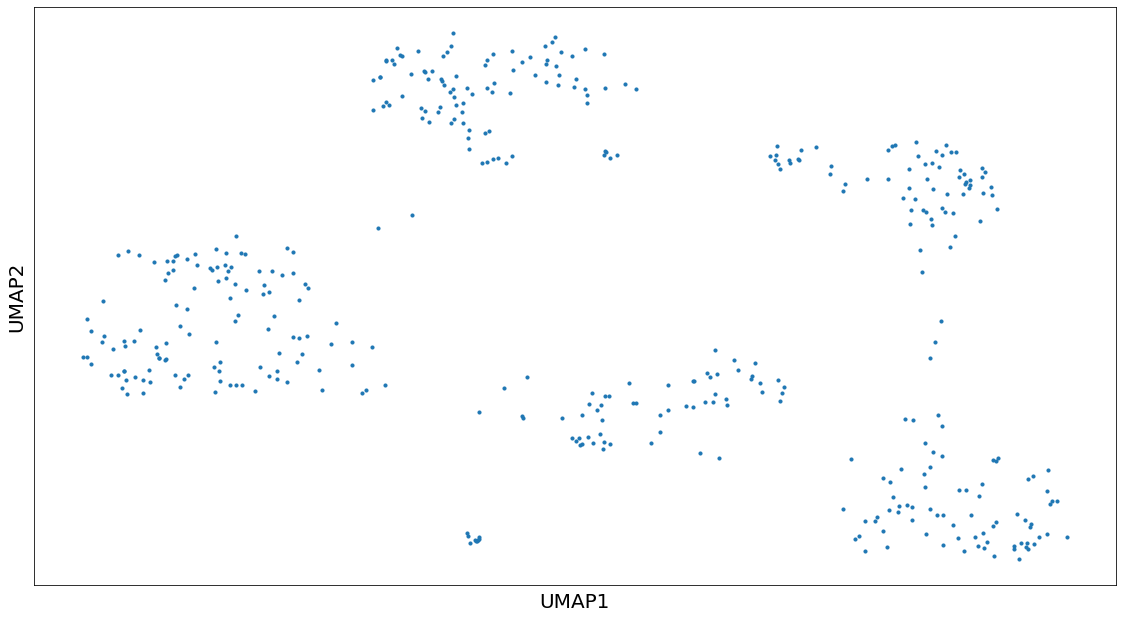

In [84]:
scprep.plot.scatter2d(data_umap,
                     figsize = the_fig_size, legend_anchor = (1,1),ticks = False, label_prefix = 'UMAP')

In [85]:
%%time

phate_op = phate.PHATE(n_jobs=-1)
data_phate = phate_op.fit_transform(data_pca)

Calculating PHATE...
  Running PHATE on 430 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.13 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.19 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 0.31 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.12 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.43 seconds.
Calculated PHATE in 1.13 seconds.
CPU times: user 806 ms, sys: 192 ms, total: 998 ms
Wall time: 1.15 s


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

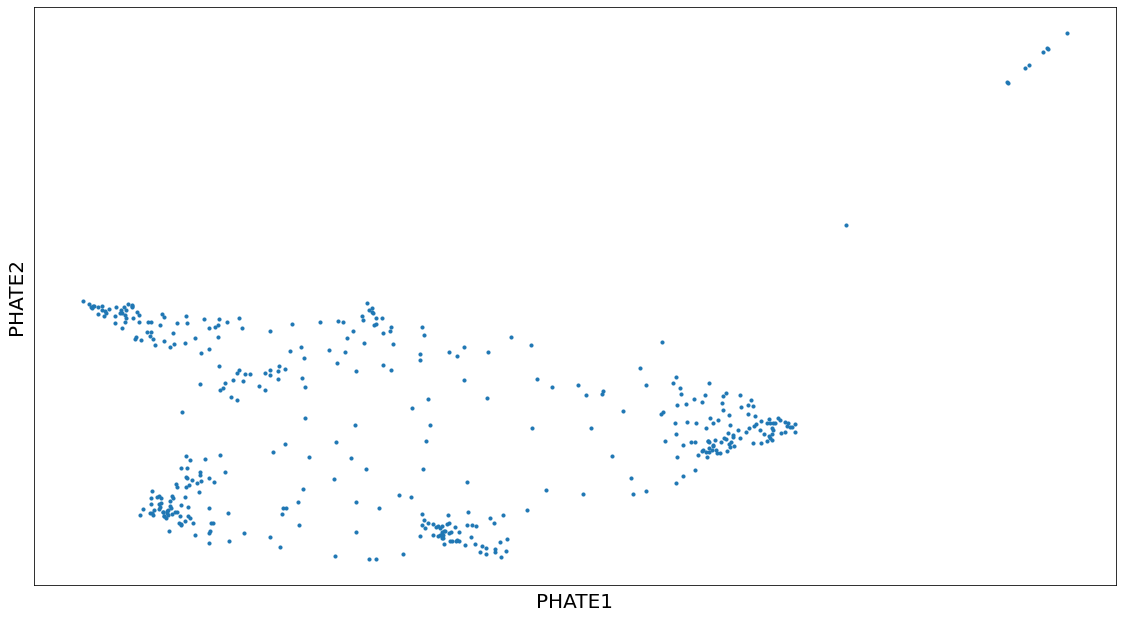

In [86]:
scprep.plot.scatter2d(data_phate,
                     figsize=the_fig_size, legend_anchor=(1,1), ticks = False, label_prefix='PHATE')

Calculating PHATE...
  Running PHATE on 430 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.17 seconds.
Calculated PHATE in 0.33 seconds.


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

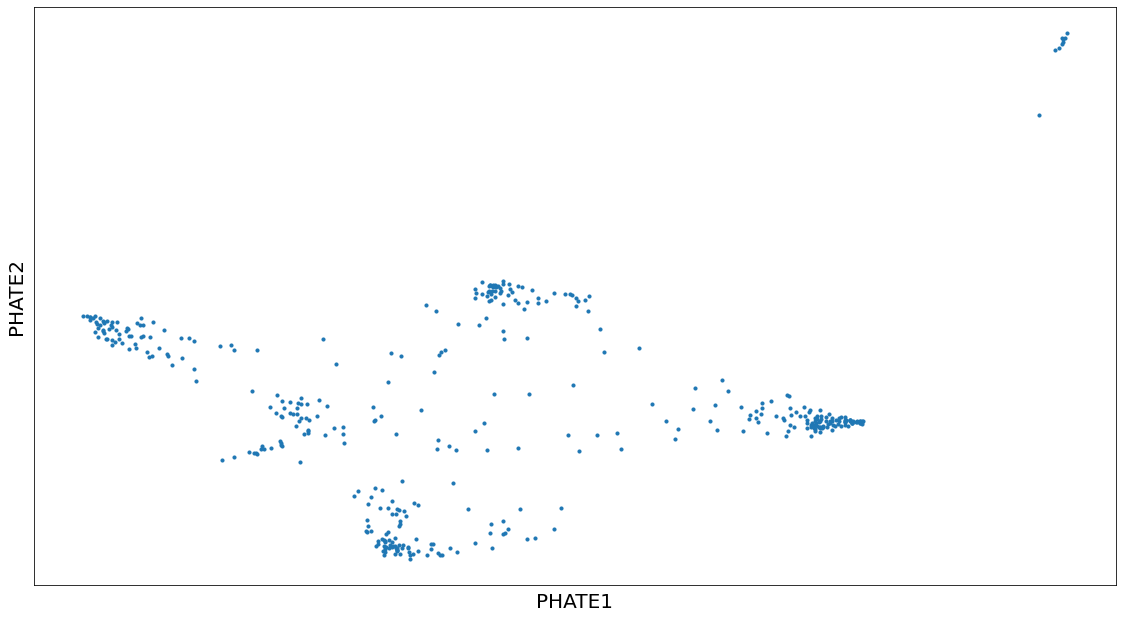

In [87]:
phate_op = phate.PHATE(knn =3, t=40, gamma=0, n_jobs= -1)
data_phate = phate_op.fit_transform(data_pca)
scprep.plot.scatter2d(data_phate,
                     figsize=the_fig_size, legend_anchor=(1,1), ticks= False, label_prefix='PHATE')

##  2. Clustering

In [ ]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(new_position)
print(label)

In [ ]:
import matplotlib.pyplot
u_labels = np.unique(label)
print(u_labels) 
#plotting the results:


for i in u_labels:
    matplotlib.pyplot.scatter(new_position[label == i , 0] , new_position[label == i , 1] , label = i)
plt.legend()
plt.show()